# Titanic Data Report
## Introducation

This is a report about the tragic incedint of The Titanic, it will use a data of demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. 

#### The aim of this report it to answer the following question: 
* What factors affected the passengers survival? 

#### Looking at the data descritption, we have many independant variables that may have affected the dependant variable which is the passnger survivial. I will consider some of these variables and study their role: 

* The Class of the passenger. 
* The Gender of the passenger. 
* Whether the passenger was travelling with family of alone. 
* The Age of the passenger, were childeren and eldery more likely to not survive. 

#### The report will be catagrazied as follows: 

1. Data Wrangling Phase. 
2. Exploration Phase. 
3. Conclusion Phase. 

 

#### Questions: 

The main question I will try to answer through this analysis is the factors that affected the survival of passengers. We have many possible factors, I will examine each one independatly and also its relation to other factors, from different angels. 

For easier flow of thought and readabilty, I will subset the main question into smaller ones:

1- Is Age in effective factor in determining the survivial of passerngers? Were Children and Elderly favored to get into lifeboats, were Male Adults more likely to survive due to their strength?    

2- How does the class of passengers affect their chance of survival? 

3- Were passengers travelling with family more likely to survive, sink togather?

4- Does the passengers Embarkation points have any affect on survival? 

5- What is the Fare prices distibution, were higher fare prices an indication of higher class, or could it be just last minutes reservation? Does it have any affect on survival? 

5- How does passengers Sex play any role in increasing the survivial of any of the previous factors? To answer this question it will be taken into considiration for all preivous ones. 


## Data Wrangling

#### Before doing any wrangling I will load the data and necessary python packages. 


In [3]:
# import all necessary packages and functions.
import sys
import csv
import unicodecsv
from datetime import datetime
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#### Import titanic data and perform data wrangling:

In this section I will load the dataset into pandas dataframe. Explore the data and provide statistics and check for missing values and outliers. But before that I have decided that these variables (PassengerId, Name, Ticket, Cabin) will not be very useful in the context of this anylsis so I will delete them. 

As stated, I want to explore the affect of whether a person is travelling with family or not, so I will construct new varibale 'Family' which will hold the count value of family members travelling togather (SibSp + Parch), a zero value if passnger is traveling alone.


1. Import the data into Pandas dataframe. 
2. Explore the data and provide statistics, 
3. Construct new varibale 'Family' which will hold the count value of family members travelling togather, a zero value if passnger is traveling alone. 
4. Delete unused variables such as 'PassengerId', 'Name', etc. 

In [128]:
# import data 
titanic_data = pd.read_csv('titanic_data.csv')
print "Dataset Sample: "
display (titanic_data.head())
display (titanic_data.tail())

# delete unneeded colomns
titanic_data.drop('PassengerId', axis=1, inplace=True)
titanic_data.drop('Name', axis=1, inplace=True)
titanic_data.drop('Ticket', axis=1, inplace=True)
titanic_data.drop('Cabin', axis=1, inplace=True)

# add new colomn 'Family' 
titanic_data['Family'] = (titanic_data['SibSp'] + titanic_data['Parch'])

# replace numeric values for plot readability: 
titanic_data['SurvivedLabel'] = titanic_data['Survived'].copy()
titanic_data['SurvivedLabel'].replace({0:'Died', 1:'Survived'}, inplace=True)
titanic_data['Embarked'].replace({'C':'Cherbourg', 'Q':'Queenstown', 'S':'Southampton'}, inplace=True)

print "Dataset Sample (after removing variables and adding new variable): "
display (titanic_data.head())
display (titanic_data.tail())

Dataset Sample: 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


KeyError: 'SurvivedLabel'

In [91]:
# get dataset overview and statistics 
print "Dataset Info: "
display (titanic_data.info())

print "Dataset Statistics: "
display (titanic_data.describe())

Dataset Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Sex              891 non-null object
Age              714 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
Embarked         889 non-null object
Family           891 non-null int64
SurvivedLabel    891 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


None

Dataset Statistics: 


,Survived,Pclass,Age,SibSp,Parch,Fare,Family
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.904602
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000


Looking at the data overview, we can detect some missing values from these coloumns (Age, Embarked), will investigate these values and determine how to deal with them.

In [92]:
is_null = titanic_data.isnull().sum()
is_null = is_null[is_null > 0]
print "Count of missing data points: "
display (is_null)

print "Percentage of missing data points: "
display (is_null /len(titanic_data)*100)

age_is_null = titanic_data['Age'].notnull()
embarked_is_null = titanic_data['Embarked'].notnull()

print "Sample of missing Age records: "
display (titanic_data[age_is_null == False].head())
display (titanic_data[age_is_null == False].tail())

print "Sample of missing Embarked records: "
display (titanic_data[embarked_is_null == False])

Count of missing data points: 


Age         177
Embarked      2
dtype: int64

Percentage of missing data points: 


Age         19.865320
Embarked     0.224467
dtype: float64

Sample of missing Age records: 


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,SurvivedLabel
5,0,3,male,NaN,0,0,8.4583,Queenstown,0,Died
17,1,2,male,NaN,0,0,13.0000,Southampton,0,Survived
19,1,3,female,NaN,0,0,7.2250,Cherbourg,0,Survived
26,0,3,male,NaN,0,0,7.2250,Cherbourg,0,Died
28,1,3,female,NaN,0,0,7.8792,Queenstown,0,Survived


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,SurvivedLabel
859,0,3,male,NaN,0,0,7.2292,Cherbourg,0,Died
863,0,3,female,NaN,8,2,69.5500,Southampton,10,Died
868,0,3,male,NaN,0,0,9.5000,Southampton,0,Died
878,0,3,male,NaN,0,0,7.8958,Southampton,0,Died
888,0,3,female,NaN,1,2,23.4500,Southampton,3,Died


Sample of missing Embarked records: 


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,SurvivedLabel
61,1,1,female,38.0,0,0,80.0,NaN,0,Survived
829,1,1,female,62.0,0,0,80.0,NaN,0,Survived


From the previous results: the percentage of missing values of (Age) is around 20% therefore it can not be ignored in this anlysis and we have to determine a way to deal with it. Whereas (Embarke) missing values is negligible so it will be left as is.  

## Data Exploration

In this section I will explore the dataset in the context of the questions proposed previously, and provide relevent visualizations.  

In [93]:
# define generic methods: 

# get the length of dataset: 
titanic_data_count = len(titanic_data)

# displays given data and rename its columns: 
def Print_Info (name, data):
    data.columns = [name, "Count", "Percentage"]
    print (name + " Info:")
    display (data)

# returns distinct values of data column: 
def Get_Colomn_Values (data): 
    return data.unique().sort()

# calcuates the percentage of selected column in dataset: 
def Get_Percentage (column, data):
    data["Percentage"] = data[column]/titanic_data_count * 100 

Survived Info:


,Survived,Count,Percentage
0,0,549,61.616162
1,1,342,38.383838


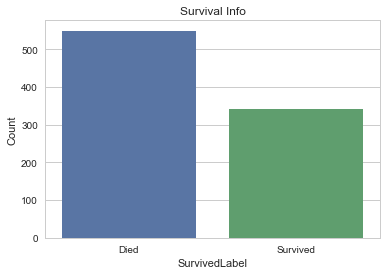

In [98]:
# Survived data info and plot: 
from numpy import mean
Survived = titanic_data[["Pclass", "Survived"]].groupby(['Survived'],as_index=False).count()
Get_Percentage("Pclass", Survived)
Survived_values =  Get_Colomn_Values(titanic_data.SurvivedLabel)

Print_Info("Survived", Survived)

plot = sns.barplot(x='SurvivedLabel', y = Survived.Count,data=titanic_data, order=Survived_values)
plot.set_title("Survival Info")
plt.ylabel("Count")

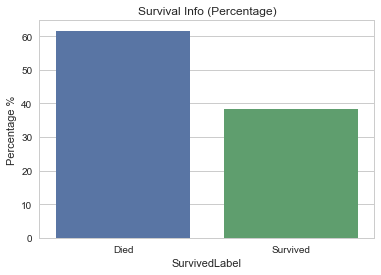

In [99]:
plot = sns.barplot(x='SurvivedLabel', y = Survived.Percentage,data=titanic_data, order=Survived_values)
plot.set_title("Survival Info (Percentage)")
plt.ylabel("Percentage %")

These plots (Survival Info, Survival Info (Percentage)) and table show the distribution, count, and percentage of each survival value. 

Sex Info:


,Sex,Count,Percentage
0,female,314,35.241302
1,male,577,64.758698


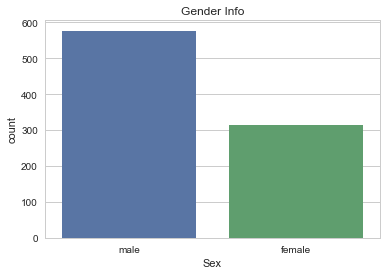

In [100]:
# Gender info and plot: 
Sex = titanic_data[["Sex", "Survived"]].groupby(['Sex'],as_index=False).count()
Get_Percentage("Survived", Sex)

Sex_values = Get_Colomn_Values(titanic_data.Sex)
Print_Info("Sex", Sex)

plot = sns.countplot(x='Sex', data=titanic_data, order=Sex_values)
plot.set_title("Gender Info")

This plot (Gender Info) shows the distibution and count of each gender in the dataset. 

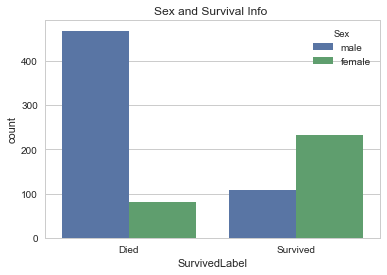

In [101]:
# Sex in relation to Survived plot: 
plot = sns.countplot(x='SurvivedLabel', hue='Sex', data=titanic_data)
plot.set_title("Sex and Survival Info ")

This plot show the relation between survival and gender, where the gender is color coded. 

### Qeustion 1 (Age): 

1- Is Age in effective factor in determining the survivial of passerngers? 

From previous exploration we have determined that Age has 20% missing values, this percentage is high and we can't drop NaN rows. So I will work with the data as is, replace NaN with (zero), but we need to take that into account when calculating statistics and visualizations. Another alternative is imputation.

Missing data points:


Survived           0
Pclass             0
Sex                0
Age              177
SibSp              0
Parch              0
Fare               0
Embarked           2
Family             0
SurvivedLabel      0
dtype: int64

Missing data points (after cleaning):


Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
Family           0
SurvivedLabel    0
dtype: int64

Age Statistics: 


count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

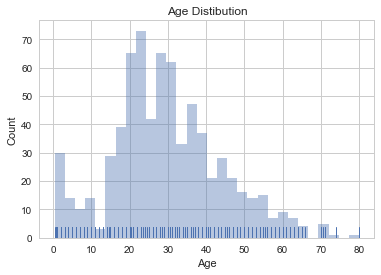

In [102]:
# Age info and plot: 


#titanic_data = titanic_data.fillna(0)
titanic_data_age = titanic_data.copy()
titanic_data_age.Age.replace("NaN",  np.nan, inplace = True)

print "Missing data points:"
display (titanic_data_age.isnull().sum())

titanic_data_age.dropna(inplace = True)

print "Missing data points (after cleaning):"
display (titanic_data_age.isnull().sum())

print "Age Statistics: "
display (titanic_data_age.Age.describe())

plot = sns.distplot(titanic_data_age.Age, bins=30, kde=False, rug=True)
plot.set_title("Age Distibution")
plt.ylabel ("Count")

This plot (Age Distribution) shows a histogram of different age values, after cleaning and removing NaN values.

Age Distibution based on Sex


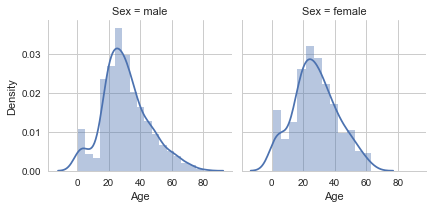

In [103]:
print "Age Distibution based on Sex"
plot = sns.FacetGrid(titanic_data_age, col="Sex")  
plot.map(sns.distplot, "Age")  
plot.set_ylabels ("Density")

Age Distibution based on Survivial


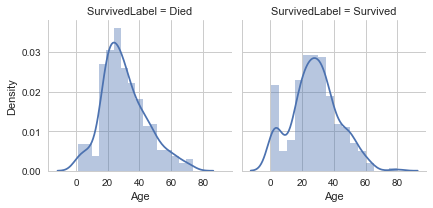

In [104]:
print "Age Distibution based on Survivial"
plot = sns.FacetGrid(titanic_data_age, col="SurvivedLabel")  
plot.map(sns.distplot, "Age")  
plot.set_ylabels ("Density")

This plot (Age Distibution based on Sex) shows a histogram and density of different age values, it's seperated for each gender value. 

This plot (Age Distibution based on Survival) shows a histogram and density of different age values, it's seperated for each survival value. 

Mean Age based on Survival:


,Survived,Age
0,0,30.626179
1,1,28.193299


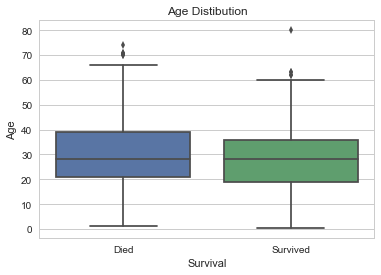

In [105]:
Age_Survived = titanic_data_age[["Age", "Survived"]].groupby(['Survived'],as_index=False).mean()
print "Mean Age based on Survival:"
display (Age_Survived)
plot = sns.boxplot(x= "SurvivedLabel", y="Age", data=titanic_data)
plot.set_title("Age Distibution")
plt.xlabel ("Survival")

This table and plot (Age Distibution) show statistics of age for each survival value. The data is represented in boxplot. 

Mean Age based on Sex and Survival:


,Survived,Sex,Age
0,0,female,25.046875
1,0,male,31.618056
2,1,female,28.630769
3,1,male,27.276022


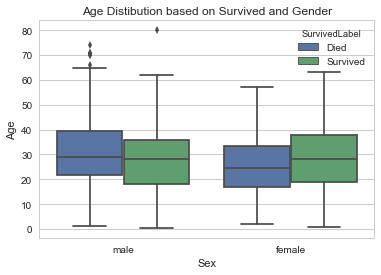

In [106]:
Age_Survived_Gender = titanic_data_age[["Age", "Survived", "Sex"]].groupby(['Survived', 'Sex'],as_index=False).mean()
print "Mean Age based on Sex and Survival:"
display (Age_Survived_Gender)

plot = sns.boxplot(x="Sex", y="Age", hue="SurvivedLabel", data=titanic_data)
plot.set_title("Age Distibution based on Survived and Gender")

This table and plot (Age Distibution based on Survived and Gender) show statistics of age for each gender value. The data is represented in boxplot, and color coded for survival. 

### Answer 1: 

Looking at these plots, the mean Age of survivial was close to each other, so we can conclude that Age didn't have any affect on survival likelyhood. 

### Question 2 (Class):

2- How does the class of passengers affect their chance of survival? 

Pclass Info:


,Pclass,Count,Percentage
0,1,216,24.242424
1,2,184,20.650954
2,3,491,55.106622


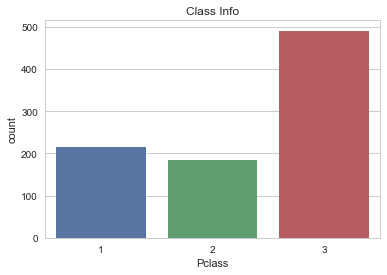

In [107]:
# Pclass info and plot: 
Pclass = titanic_data[["Pclass", "Survived"]].groupby(['Pclass'],as_index=False).count()
Get_Percentage("Survived", Pclass)

Pclass_values = Get_Colomn_Values(titanic_data.Pclass)
Print_Info("Pclass", Pclass)

plot = sns.countplot(x='Pclass', data=titanic_data, order=Pclass_values)
plot.set_title("Class Info")

These plots (Class Info) and table show the distribution, count, and percentage of each class value. 

Count of Survived based on Pclass: 


,Pclass,Survived,Count
0,1,0,80
1,1,1,136
2,2,0,97
3,2,1,87
4,3,0,372
5,3,1,119


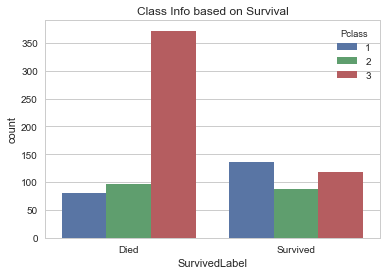

In [108]:
# Pclass in relation to Survived plot: 

print "Count of Survived based on Pclass: "
Pclass_Survived = titanic_data[["Pclass", "Survived", "Sex"]].groupby(['Pclass','Survived'],as_index=False).count()
Pclass_Survived.columns = ["Pclass", "Survived", "Count"]
display(Pclass_Survived)

plot = sns.countplot(x='SurvivedLabel', hue='Pclass', data=titanic_data)
plot.set_title("Class Info based on Survival")

This plot (Class Info based on Survival) and table show the distribution, count, and percentage of survival for each class.  

Count of Survived based on Pclass and Sex: 


,Pclass,Sex,Survived
0,1,female,94
1,1,male,122
2,2,female,76
3,2,male,108
4,3,female,144
5,3,male,347


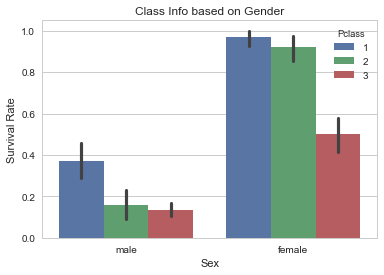

In [110]:
print "Count of Survived based on Pclass and Sex: "
Pclass_Survived = titanic_data[["Pclass", "Sex", "Survived"]].groupby(['Pclass', 'Sex'],as_index=False).count()
Pclass_Survived_Sex = titanic_data[["Pclass", "Sex", "Survived", 'Age']].groupby(['Pclass', 'Sex', 'Survived'],as_index=False).count()

display(Pclass_Survived)
plot = sns.barplot(x=titanic_data.Sex, y=titanic_data.Survived, hue=titanic_data.Pclass, 
            estimator=mean)
plot.set_title("Class Info based on Gender")
plt.ylabel ("Survival Rate")

Class Info and Survived rate based on Gender


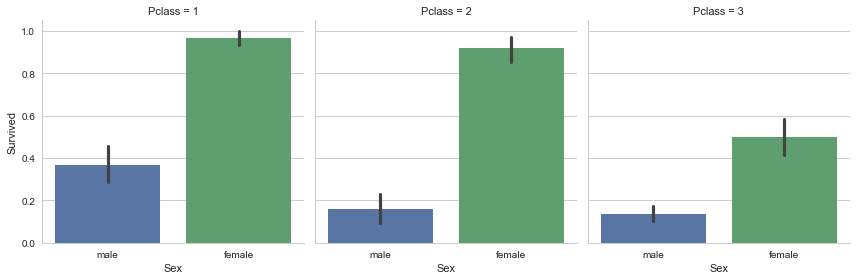

In [111]:
print "Class Info and Survived rate based on Gender"
sns.factorplot(x="Sex", y="Survived", col="Pclass", data=titanic_data, kind="bar")

Thess plot (Class Info based on Gender, Class Info and Survived rate based on Gender) and table show the survival rate for each class, based on gender.   

### Answer 2: 

From above various plots and statistics, we can conclude that Class was indeed a factor in passengers survival, even though the percentage of passengers on this class is lower, the survival rate was higher. Gender was also a factor in this situation as we can see Female passengers were more likly to survive than Male passengers. 

### Question 3 (Family):

3- Were passengers travelling with family more likely to survive, or sink togather?

Family Info:


,Family,Count,Percentage
0,0,537,60.269360
1,1,161,18.069585
2,2,102,11.447811
3,3,29,3.254770
4,4,15,1.683502
5,5,22,2.469136
6,6,12,1.346801
7,7,6,0.673401
8,10,7,0.785634


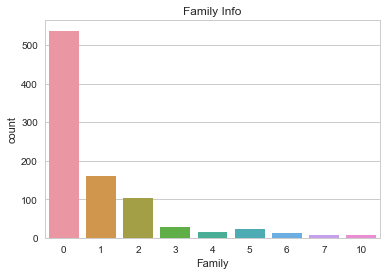

In [112]:
# Family info and plot: 

Family = titanic_data[["Family", "Survived"]].groupby(['Family'],as_index=False).count()
Get_Percentage("Survived", Family)

Family_values = Get_Colomn_Values(titanic_data.Family)
Print_Info("Family", Family)

plot = sns.countplot(x='Family', data=titanic_data, order=Family_values)
plot.set_title("Family Info")

This plot (Family Info) and table show the distribution, count, and percentage of each family members value. 

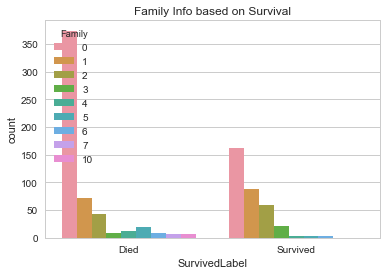

In [113]:
# Family in relation to Survived plot: 
plot = sns.countplot(x='SurvivedLabel', hue='Family', data=titanic_data)
plot.set_title("Family Info based on Survival")

This plot (Family Info based on Survival) shows the distribution, count, survival for family members value. 

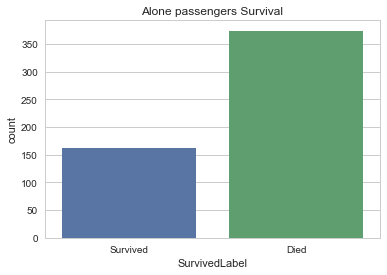

In [114]:
plot = sns.countplot(x='SurvivedLabel', data=titanic_data.where(titanic_data.Family == 0))
plot.set_title("Alone passengers Survival")

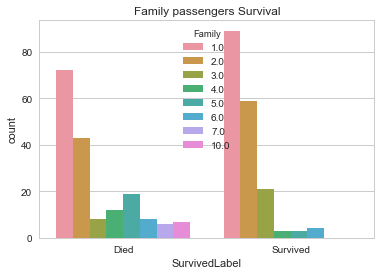

In [115]:
plot = sns.countplot(x='SurvivedLabel', hue = 'Family',data=titanic_data.where(titanic_data.Family > 0))
plot.set_title("Family passengers Survival")

This plot (Alone passengers Survival) shows the distibution of survival for passengers traveling alone, with no family members. 

This plot (Family passengers Survival) shows the distibution of survival for passengers traveling with family members. 

In [116]:
print "Largest Family Survived:"
largest_family_survived = titanic_data.where(titanic_data.Survived == 1)
print largest_family_survived.Family.max()

Largest Family Survived:
6.0


Age Distibution based on Family


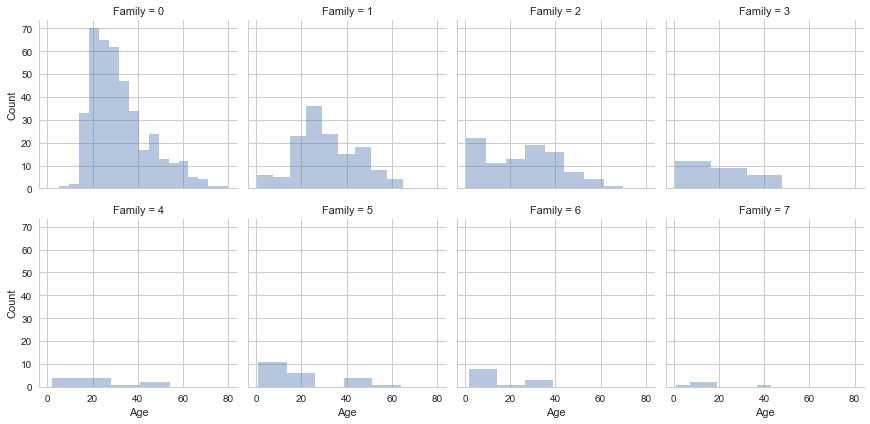

In [117]:
print "Age Distibution based on Family"
plot = sns.FacetGrid(titanic_data_age, col="Family", col_wrap = 4)  
plot.map(sns.distplot, "Age", kde = False)  
plot.set_ylabels ("Count")

This plot (Age Distibution based on Family) shows the distribution of age based for each family members count.

### Answer 3: 

From these plots and statistics it would appear that families somewhat had better chance of survival, but it wasn't the case for large families (7,10) members. Although this has some limitations which will be explored in the Limitation section of this report. 

### Question 4 (Embarked): 

4- Does the passengers Embarkation points have any affect on survival? 


Embarked Info:


,Embarked,Count,Percentage
0,Cherbourg,168,18.855219
1,Queenstown,77,8.641975
2,Southampton,644,72.278339


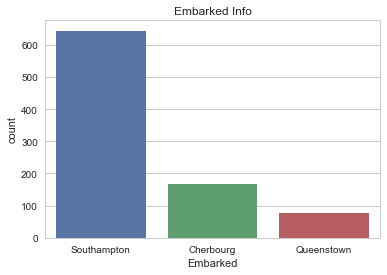

In [118]:
# Embarked info and plot: 
Embarked = titanic_data[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).count()
Get_Percentage("Survived", Embarked)

Embarked_values = Get_Colomn_Values(titanic_data.Embarked)
Print_Info("Embarked", Embarked)

plot = sns.countplot(x='Embarked', data=titanic_data, order=Embarked_values)
plot.set_title("Embarked Info")

This plot (Embarked Info) and table show the distribution, count, and percentage of each embarkation point. 

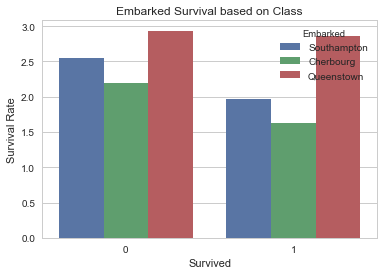

In [119]:
plot = sns.barplot(x=titanic_data.Survived, y=titanic_data.Pclass, hue=titanic_data.Embarked, ci = None)
plot.set_title("Embarked Survival based on Class")
plt.ylabel ("Survival Rate")

This plot (Embarked Survival based on Class) shows the survival rate of each embarkation point based on class.

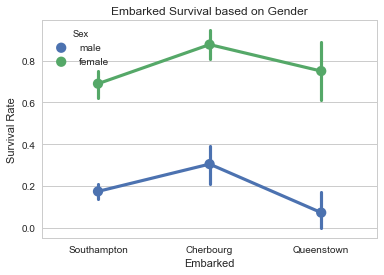

In [121]:
plot = sns.pointplot(x="Embarked", y="Survived", hue="Sex", data=titanic_data)
plot.set_title("Embarked Survival based on Gender")
plt.ylabel ("Survival Rate")

This plot (Embarked Survival based on Gender) shows the survival rate of each embarkation point based on gender.

### Answer 4:

From above plots, it doesn't appear to be strong factor of survival based on Embarkation points. 

### Question 5: 

5- What is the Fare prices distibution, were higher fare prices an indication of higher class, or could it be just last minutes reservation? Does it have any affect on survival? 

Fare Statistics: 


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

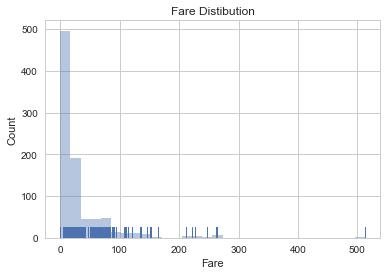

In [122]:
# Fare info and plot: 

print "Fare Statistics: "
display (titanic_data.Fare.describe())

plot = sns.distplot(titanic_data.Fare, bins=30, kde=False, rug=True)
plot.set_title("Fare Distibution")
plt.ylabel ("Count")

This plot (Fare Distibution) shows a histogram distibution of fare. 

Fare Distibution based on Class


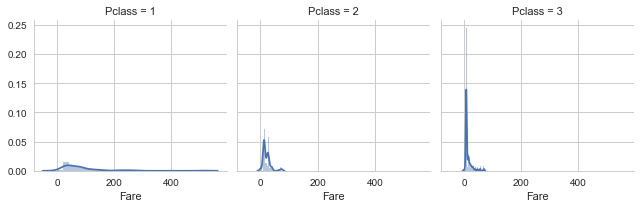

In [123]:
print "Fare Distibution based on Class"
plot = sns.FacetGrid(titanic_data, col="Pclass")  
plot.map(sns.distplot, "Fare") 

Fare Disribution based on Emabarked


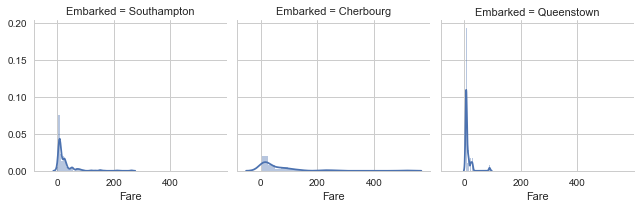

In [124]:
print "Fare Disribution based on Emabarked"
plot = sns.FacetGrid(titanic_data, col="Embarked")  
plot.map(sns.distplot, "Fare") 

Fare Disribution based on Survival


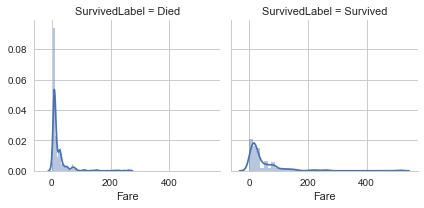

In [125]:
print "Fare Disribution based on Survival"
plot = sns.FacetGrid(titanic_data, col="SurvivedLabel")  
plot.map(sns.distplot, "Fare") 

This plot (Fare Distibution based on Class) shows a histogram distibution of fare based on Class. 

This plot (Fare Distibution based on Emabrked) shows a histogram distibution of fare based on embarkation point. 

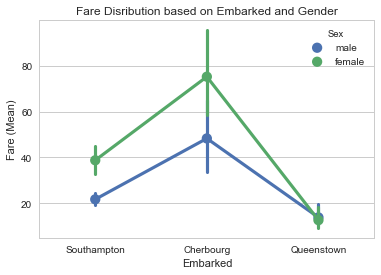

In [126]:
plot = sns.pointplot(x="Embarked", y="Fare", hue="Sex", data=titanic_data)
plot.set_title("Fare Disribution based on Embarked and Gender")
plt.ylabel ("Fare (Mean)")

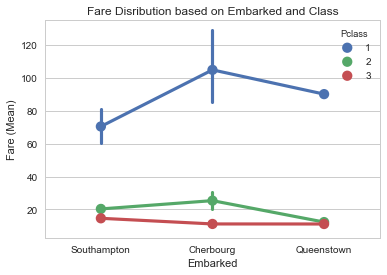

In [127]:
plot = sns.pointplot(x="Embarked", y="Fare", hue="Pclass", data=titanic_data)
plot.set_title("Fare Disribution based on Embarked and Class")
plt.ylabel ("Fare (Mean)")

This plot (Fare Disribution based on Embarked and Gender) shows the mean distibution of fare based on embarkation point and gender. 

This plot (Fare Disribution based on Embarked and Class) shows the mean distibution of fare based on embarkation point and class. 

### Answer 5: 

The price distirbution is skewed, with lower fares represent lower class. Also, from the survival plot we can see that higher fares were found in survived passengers, which supports that class was indeed a factor in survival.

It's interesting to see from this plot 'Fare Disribution based on Embarked and Class' that the mean prices for class 2, and 3 isn't that different where it is below (40), I wonder what is considered different class back then. It also appear that Fare may be dependant on the embarked point, where 'Cherbourg (C)' is difinatly higher than other ones!  

## Conclusion and Limitatations: 

As per the previous exploration of data in different aspects, we can see that there're noticibale insights: 

* Class: 
    1. Third class passengers were more likely to not have survived. 
    2. First class passengers had higher chnace of surviverl


* Family: 
    1. Alone passengers were more likely to not have survived.
    2. Bigger families didn't survive. 


* Embarkation Point: 
    1. Embarkation didn't have noticable affect on survival, but it sure did affect on the price range!


* Fare: 
   1. I was very interested to explore this factor, although it's not related to survival, but I wanted to explore how the economy was in that period of time. 


* Sex: 
    1. Female passengers were more likely to have survived, as obbosed to Male passengers, this was signficant when combined with other factors. 

### Possible limitations: 

When trying to investigate the affect of family I would have liked to indicate and group each family together. Also for the Age factor is was somewhat a setback that it has many missing data points.